In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class MonteCarloOption:
    def __init__(self, K, S0, r, sigma, T, P, M):
        self.K = K              # Strike price
        self.S0 = S0            # Initial stock price
        self.r = r              # Risk-free interest rate
        self.sigma = sigma      # Volatility
        self.T = T              # Time to maturity (in years)
        self.P = P              # Number of simulation paths
        self.M = M              # Number of time steps
        self.S = None           # To store simulated price paths
        self.C0 = None          # Option price result

    def calcul(self):
        dt = self.T / self.M
        # Initialize matrix to store paths: rows=time steps, columns=paths
        self.S = np.zeros((self.M + 1, self.P))
        self.S[0] = self.S0

        for t in range(1, self.M + 1):
            # Generate standard normal random variables for each path
            eps = np.random.standard_normal(self.P)
            # Simulate next step using Geometric Brownian Motion formula
            self.S[t] = self.S[t - 1] * np.exp(
                (self.r - 0.5 * self.sigma ** 2) * dt + self.sigma * eps * np.sqrt(dt)
            )

        # Calculate the discounted payoff of the European call option
        payoff = np.maximum(self.S[-1] - self.K, 0)
        self.C0 = np.exp(-self.r * self.T) * np.mean(payoff)
        return self.C0

    def plot(self):
        if self.S is None:
            raise ValueError("Paths have not been calculated yet. Call 'calcul()' before 'plot()'.")

        fig, ax = plt.subplots(figsize=(16, 6))
        # Plot one path out of every 20 to avoid clutter
        ax.plot(self.S[:, ::20])
        # Draw horizontal line for strike price
        ax.axhline(self.K, color='r', linestyle='dashed', linewidth=2, label='Strike')
        ax.set_xlabel('Time Steps')
        ax.set_ylabel('Asset Price')
        ax.set_title('Monte Carlo Simulation of Geometric Brownian Motion')
        ax.legend()
        ax.grid(True)
        plt.tight_layout()
        plt.show()

Estimated price of the European Call option: 2.5242


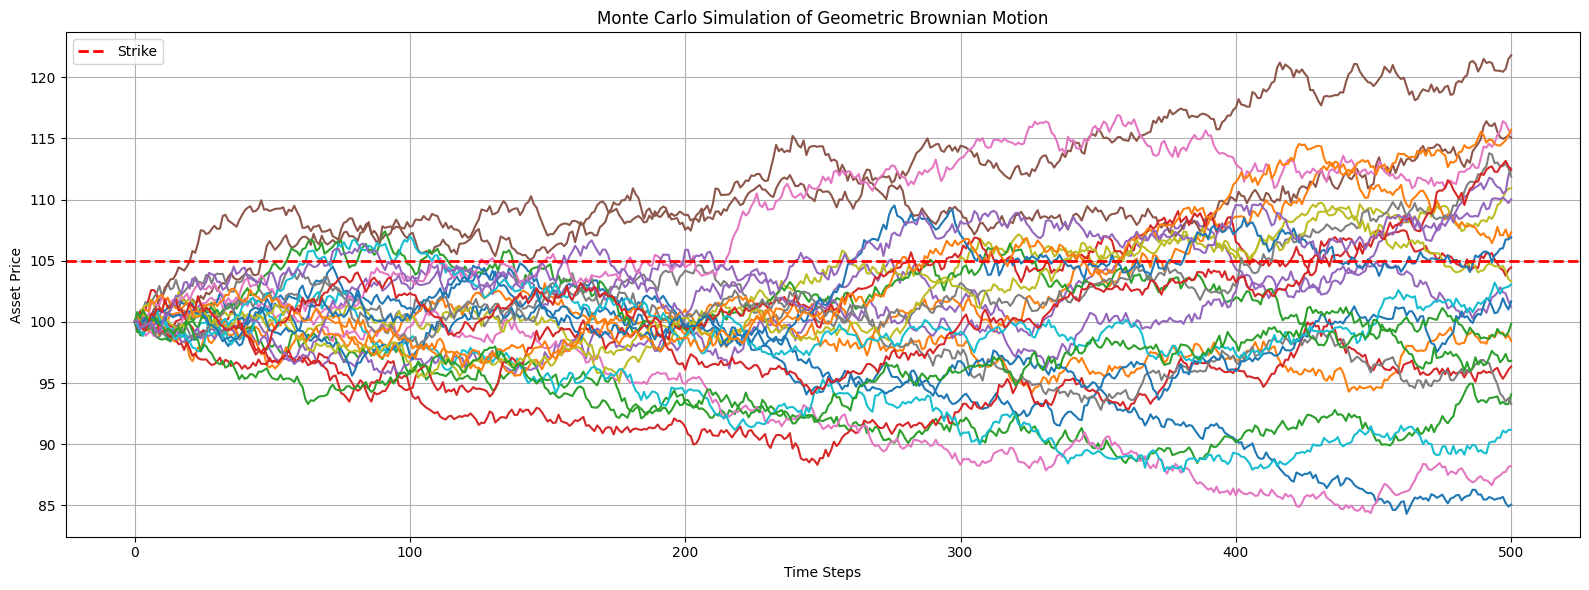

In [5]:
# Example usage
if __name__ == "__main__":
    mc = MonteCarloOption(K=105, S0=100, r=0.05, sigma=0.12, T=0.5, P=500, M=500)
    option_price = mc.calcul()
    print(f"Estimated price of the European Call option: {option_price:.4f}")
    mc.plot()
